# Importing Libraries

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1a) OR Gate data

In [2]:
df = [[1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 1]]
  
# Create the pandas DataFrame
data_or = pd.DataFrame(df, columns=['Bias', 'A', 'B', 'Output'])

data_or

,Bias,A,B,Output
0,1,0,0,0
1,1,0,1,1
2,1,1,0,1
3,1,1,1,1


In [3]:
X_or = data_or.drop(columns = ['Output'])
y_or = data_or['Output']

### Model

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def BCE_cost(X, y, w):
    m = len(y)
    g = sigmoid(X @ w)
    cost = (1 / m) * (-y.T @ np.log(g) - (1 - y).T @ np.log(1 - g))
    return cost

In [6]:
def logistic_regression(X, y, w, alpha, num_epochs):
    m = len(y)

    for i in tqdm(range(num_epochs)):
        g = sigmoid(X @ w)
        w = w - (alpha / (m)) * (X.T @ (g - y))

    return w

In [7]:
w = np.ones((X_or.shape[1], 1))

w_or = logistic_regression(X_or, y_or, w, 0.0008, 2150)

100%|██████████| 2150/2150 [00:04<00:00, 493.31it/s]


### weights

In [8]:
print(w_or[0])

Bias   -0.216158
A       0.342245
B       0.342245
Name: 0, dtype: float64


### Conclusion on weights

- we can see that [w_Bias = -0.15, w_A = 0.37, w_B = 0.37].
- so when both A and B are '0', the bias is negative and hence the linear prediction is -ve, and in-turn the sigmoid will be less than 0.5
- as |w_A| = |w_B| > |w_Bias|, when atleast 1 of them has '1' input, the sum will be +ve, hence sigmoid will be greater than 0.5

In [9]:
def logistic_prediction(pred):
    for i in pred:
        if i<0.5:
            print(0)
        else:
            print(1)

### predictions

In [10]:
logistic_prediction(sigmoid(X_or @ w_or)[0])

0
1
1
1


### Decision Boundary

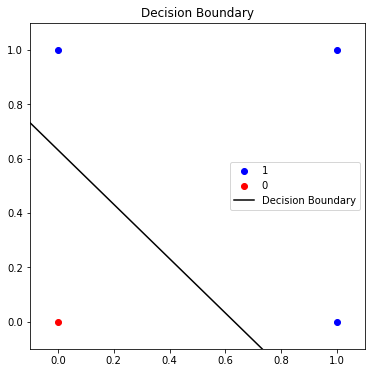

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter([0,1,1],[1,0,1], c = 'b')
plt.scatter([0],[0], c = 'r')

x = np.linspace(-0.5, 2, 80)
plt.plot(x, - (w_or[0][0] + w_or[0][1]*x)/(w_or[0][2]), '-k')

plt.legend(['1', '0', 'Decision Boundary'])
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Decision Boundary')

plt.show()

### plotting the prediction

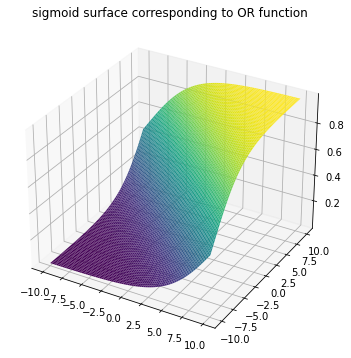

In [12]:
def plot(x, y, w):
    return sigmoid(w[0][0] + w[0][1]*x + w[0][2]*y)

x = np.linspace(-10, 10, 80)
y = np.linspace(-10, 10, 80)

X, Y = np.meshgrid(x, y)
Z = plot(X, Y, w_or)

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('sigmoid surface corresponding to OR function');

plt.show()

# 1b) AND Gate data

In [13]:
df_and = [[1, 0, 0, 0], [1, 0, 1, 0], [1, 1, 0, 0], [1, 1, 1, 1]]
  
# Create the pandas DataFrame
data_and = pd.DataFrame(df_and, columns=['Bias', 'A', 'B', 'Output'])

data_and

,Bias,A,B,Output
0,1,0,0,0
1,1,0,1,0
2,1,1,0,0
3,1,1,1,1


In [14]:
X_and = data_and.drop(columns = ['Output'])
y_and = data_and['Output']

In [15]:
w = np.ones((X_and.shape[1], 1))
w_and = logistic_regression(X_and, y_and, w, 0.0008, 2500)

100%|██████████| 2500/2500 [00:05<00:00, 484.56it/s]


### weights

In [16]:
print(w_and[0])

Bias   -0.357254
A       0.266429
B       0.266429
Name: 0, dtype: float64


### Conclusion on weights

- we can see that [w_Bias = -0.53, w_A = 0.17, w_B = 0.17].
- so when both A and B are '0', the bias is negative and hence the linear prediction is -ve, and in-turn the sigmoid will be less than 0.5
- as |w_Bias| > |w_A| = |w_B| , when **one** of them has '1' input, the sum will still be -ve, hence sigmoid will be less than 0.5
- now |w_A| + |w_B| > |w_Bias| , hence when both inputs are '1', the sum will be +ve, hence sigmoid will be greater than 0.5

### predictions

In [17]:
logistic_prediction(sigmoid(X_and @ w_and)[0])

0
0
0
1


### Decision Boundary

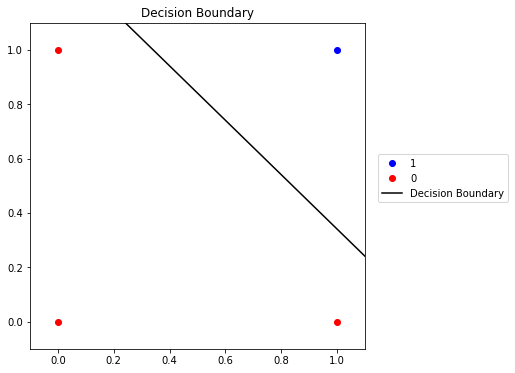

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter([1],[1], c = 'b')
plt.scatter([0,0,1],[0,1,0], c = 'r')

x = np.linspace(-0.5, 2, 80)
plt.plot(x, - (w_and[0][0] + w_and[0][1]*x)/(w_and[0][2]), '-k')

plt.legend(['1', '0', 'Decision Boundary'],loc=(1.04, 0.45))
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Decision Boundary')

plt.show()

### plotting the prediction

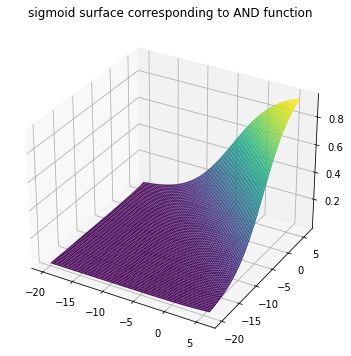

In [19]:
def plot(x, y, w):
    return sigmoid(w[0][0] + w[0][1]*x + w[0][2]*y)

x = np.linspace(-20, 6, 80)
y = np.linspace(-20, 6, 80)

X, Y = np.meshgrid(x, y)
Z = plot(X, Y, w_and)

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('sigmoid surface corresponding to AND function');

plt.show()

# 1b) XOR Gate data

In [20]:
df_xor = [[1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]]
  
# Create the pandas DataFrame
data_xor = pd.DataFrame(df_xor, columns=['Bias', 'A', 'B', 'Output'])

data_xor

,Bias,A,B,Output
0,1,0,0,0
1,1,0,1,1
2,1,1,0,1
3,1,1,1,0


In [21]:
X_xor = data_xor.drop(columns = ['Output'])
y_xor = data_xor['Output']

In [22]:
w = np.ones((X_xor.shape[1], 1))
w_xor = logistic_regression(X_xor, y_xor, w, 0.0008, 2000)

100%|██████████| 2000/2000 [00:03<00:00, 519.02it/s]


### weights

In [23]:
print(w_xor[0])

Bias   -0.150968
A       0.377489
B       0.377489
Name: 0, dtype: float64


### predictions

In [24]:
logistic_prediction(sigmoid(X_xor @ w_xor)[0])

0
1
1
1


### Decision Boundary

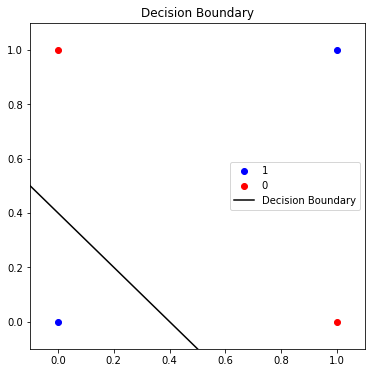

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter([0,1],[0,1], c = 'b')
plt.scatter([0,1],[1,0], c = 'r')

x = np.linspace(-0.5, 2, 80)
plt.plot(x, - (w_xor[0][0] + w_xor[0][1]*x)/(w_xor[0][2]), '-k')

plt.legend(['1', '0', 'Decision Boundary'])
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Decision Boundary')

plt.show()

### Conclusion on weights



- We can see that, it is not possible to fit XOR gate using logistic regression because the XOR gate values are not linearly separable.
- Hence one point is classified wrong when classification is done using logistic regression

# 2a) Multiclass Classification on IRIS Dataset

### Preparing the Data

In [26]:
data = pd.read_csv('iris.data', header=None)

In [27]:
data.columns = ['X1', 'X2', 'X3', 'X4', 'Y']

In [28]:
data.head()

,X1,X2,X3,X4,Y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
y = [] #OneHotEncoder

for i in data.Y:
    if i == data.Y.unique()[0]:
        y.append([1,0,0])
    elif i == data.Y.unique()[1]:
        y.append([0,1,0])
    elif i == data.Y.unique()[2]:
        y.append([0,0,1])

In [30]:
data['y'] = y

In [31]:
y = np.array([np.array(yi) for yi in y])

In [32]:
data.head()

,X1,X2,X3,X4,Y,y
0,5.1,3.5,1.4,0.2,Iris-setosa,"[1, 0, 0]"
1,4.9,3.0,1.4,0.2,Iris-setosa,"[1, 0, 0]"
2,4.7,3.2,1.3,0.2,Iris-setosa,"[1, 0, 0]"
3,4.6,3.1,1.5,0.2,Iris-setosa,"[1, 0, 0]"
4,5.0,3.6,1.4,0.2,Iris-setosa,"[1, 0, 0]"


In [33]:
X0 = [1]*len(data)
data.insert(loc=0, column='X0', value=X0)
X = data.drop(columns = ['Y','y'])

Y = data['y']

### Model

In [34]:
y_train = np.array([np.array(yi) for yi in y])

In [35]:
#initialize weights
W = np.random.randn(len(y_train[0]), len(list(X)))

In [36]:
X_train = X.to_numpy()

In [37]:
def softmax(y):
    r,c = y.shape
    g = []
    for i in range(c):
        sig = 0
        for j in range(r):
            sig += np.exp(y[j][i])
        g.append([np.exp(y[j][i])/sig for j in range(r)])
    return np.array(g).T

In [38]:
def GCE_loss(y_hat, y_train):
    loss = -np.sum(np.multiply(y_train,np.log(y_hat)))
    return(loss)

In [39]:
def multiclass_logistic_regression(X_train, y_train, W, alpha, n_epochs):
    i=1
    global loss_train, n_iter
    loss_train = []
    n_iter = []
    
    for j in range(n_epochs):
        z = W @ X_train.T
        y_hat = softmax(z)
        e = y_hat - y_train.T

        W = W - alpha * e @ X_train
        
        loss = GCE_loss(y_hat, y_train.T)
        
        if (i == 1) or (i%10 == 0) or (i == n_epochs):
            if (i == 1) or (i%1000 == 0) or (i == n_epochs):
                print('Epoch [{}/{}], Loss: {:.4f}'.format(i, n_epochs, loss))
            
            loss_train.append(loss)
            
            n_iter.append(i)
        
        i+=1
    return W

### Training

In [40]:
W_trained = multiclass_logistic_regression(X_train, y_train, W, 0.01, 25000)

Epoch [1/25000], Loss: 1465.2171
Epoch [1000/25000], Loss: 15.0742
Epoch [2000/25000], Loss: 13.1087
Epoch [3000/25000], Loss: 11.9214
Epoch [4000/25000], Loss: 11.5164
Epoch [5000/25000], Loss: 11.6608
Epoch [6000/25000], Loss: 11.5663
Epoch [7000/25000], Loss: 11.2698
Epoch [8000/25000], Loss: 10.9559
Epoch [9000/25000], Loss: 10.6748
Epoch [10000/25000], Loss: 10.4303
Epoch [11000/25000], Loss: 10.2163
Epoch [12000/25000], Loss: 10.0263
Epoch [13000/25000], Loss: 9.8552
Epoch [14000/25000], Loss: 9.6992
Epoch [15000/25000], Loss: 9.5555
Epoch [16000/25000], Loss: 9.4225
Epoch [17000/25000], Loss: 9.2989
Epoch [18000/25000], Loss: 9.1840
Epoch [19000/25000], Loss: 9.0772
Epoch [20000/25000], Loss: 8.9780
Epoch [21000/25000], Loss: 6.2488
Epoch [22000/25000], Loss: 8.8965
Epoch [23000/25000], Loss: 9.8228
Epoch [24000/25000], Loss: 6.1445
Epoch [25000/25000], Loss: 6.1949


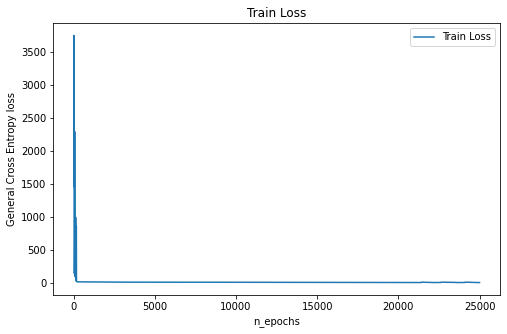

In [41]:
plt.figure(figsize=(8, 5))

plt.plot(n_iter, loss_train)

plt.legend(['Train Loss'])
plt.ylabel('General Cross Entropy loss')
plt.xlabel('n_epochs')
plt.title('Train Loss')
plt.show()

### Train Accuracy

In [42]:
def decision(y_hat):
    r,c = y_hat.shape
    for i in range(c):
        if y_hat[0][i]>=y_hat[1][i] and y_hat[0][i]>=y_hat[2][i]:
            y_hat[0][i] = 1
            y_hat[1][i] = 0
            y_hat[2][i] = 0
            
        if y_hat[1][i]>=y_hat[2][i] and y_hat[1][i]>=y_hat[0][i]:
            y_hat[0][i] = 0
            y_hat[1][i] = 1
            y_hat[2][i] = 0

        if y_hat[2][i]>=y_hat[1][i] and y_hat[2][i]>=y_hat[0][i]:
            y_hat[0][i] = 0
            y_hat[1][i] = 0
            y_hat[2][i] = 1
    return y_hat

In [43]:
z = W_trained @ X_train.T
y_hat = softmax(z)

In [44]:
y_hat_pred = decision(y_hat)
y_hat_pred = (np.rint(y_hat_pred)).astype(int)

In [45]:
acc_train = (1 - (np.sum(np.absolute(y_hat_pred - y_train.T)))/(2*y_hat.shape[1]))*100
print('Train Accuracy =', acc_train)
print('implies that', round(acc_train,2), '% of Training instances were predicted right')

Train Accuracy = 98.66666666666667
implies that 98.67 % of Training instances were predicted right


# 2b) Confusion Matrix

In [46]:
# Iri-setosa      - 0
# Iris-versicolor - 1
# Iris-verginicia - 2

In [47]:
def decision_values(y_hat):
    y_pred = []
    r,c = y_hat.shape
    for i in range(c):
        if y_hat[0][i]>=y_hat[1][i] and y_hat[0][i]>=y_hat[2][i]:
            y_pred.append(0)
            
        if y_hat[1][i]>=y_hat[2][i] and y_hat[1][i]>=y_hat[0][i]:
            y_pred.append(1)

        if y_hat[2][i]>=y_hat[1][i] and y_hat[2][i]>=y_hat[0][i]:
            y_pred.append(2)
            
    return y_pred

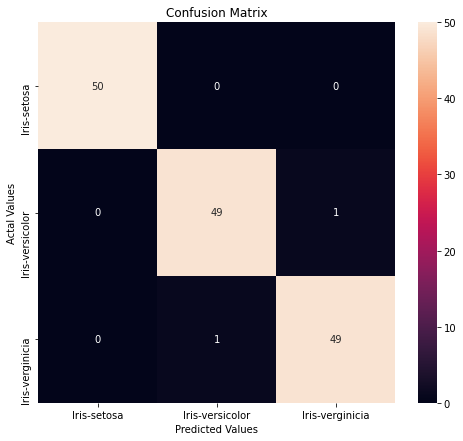

In [48]:
cm = confusion_matrix(decision_values(y_train.T), decision_values(y_hat))

cm_df = pd.DataFrame(cm,
                     index = ['Iris-setosa','Iris-versicolor','Iris-verginicia'], 
                     columns = ['Iris-setosa','Iris-versicolor','Iris-verginicia'])

plt.figure(figsize=(8,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

$$
Thank You
$$